# **LAB 5 For Data Analytics :- ⚡ ✨**

***Represented by*** :- *Ahmed Elsayed Salama ( **6** ) 💛*  

# **File Contents :-**
The file Contains the answer of the **5 Tasks**  

# **Problem Formulation :-**

# **1 - What is the input?**
-> File .csv format Contains **100** rows × **3** columns called **Labels**


The **File** Contains ( **100 Waves** ) .wav extention

---------------------------------------------

# **2 - What is the output?**

-> **Transform** Wav to text .

-> So ,  **predict** how match **Labels** look like **Predicted .**

--------------------------------------------

# **3 - What data mining function is required?**

-> **clean** our input data to get the desired knowledge .

-> **Data mining** generally refers to examining a large amount of data to extract valuable information. The data mining process uses predictive models based on existing and historical data to project potential outcome for business activities and transactions.

--------------------------------------------------

# **4 - What could be the challenges?**

1 - **Decribe** the dataset .

2- **Check** the Quality of dataSet .

3- **Interact** with Audios . 

5- **Using** preTrained models  .


-----------------------------------------

# **5 - What is the impact?**
 -> So ,  predict how match **Labels** look like **Predicted .**


# **References**
1 - https://pytorch.org/tutorials/intermediate/speech_recognition_pipeline_tutorial.html

2 - https://github.com/jitsi/jiwer

# Lab 5: Deep learning based end-to-end speech recognition 

The goal of this assignment is to get familiar with applications that require speech data as input.

We would be using the torchaudio library (pip install torchaudio==0.11.0), please carefull read this tutorial https://pytorch.org/tutorials/intermediate/speech_recognition_pipeline_tutorial.html

Next, we would ask you to perform similar analysis on a speech dataset, i.e., speechdata.zip. Unzip this folder, you would see a folder named wavs, and a file called "labels.csv", containing annotated transcripts, including the files in the wavs folder (you have more labels in labels.csv). This dataset is selected from https://keithito.com/LJ-Speech-Dataset/, a famous speech-based application benchmark.

General torchaudio tutorials: https://pytorch.org/tutorials/index.html

**Submission: submit via onq.** 


# **Import Libraries**

In [7]:
# Import needed libraries. 
from zipfile import ZipFile
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
#
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
from scipy.fftpack import fft
from scipy import signal
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from IPython.display import Audio 
from IPython.core.display import display

import os

import IPython
import matplotlib
import matplotlib.pyplot as plt
import requests
import torch
import torchaudio
! pip install jiwer
import jiwer

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ahmedsalamas/speechdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 38% 9.00M/24.0M [00:00<00:00, 37.3MB/s]
100% 24.0M/24.0M [00:00<00:00, 73.9MB/s]


In [9]:
zip = ZipFile('/content/speechdata.zip')
zip.extractall()
zip.close()

## Task 1: Basic data exploration
Select one randomly sampled wav file in the given folder, perform the following analysis:

1) Print the **shape** of the picked waveform

2) Print the **sample rate** of the waveform. 

3) Visualize the **waveform** using matplotlib

4) Create the **spectrogram** representation of the picked waveform and visualize it. 

5) Create the **MFCC** representation of the picked waveform and visualize it.

Reference: https://www.kaggle.com/code/davids1992/speech-representation-and-data-exploration/notebook 

## **Part 1**
1)  Print the **shape** of the picked waveform .
 
2)  Print the **sample rate** of the waveform .

In [10]:
# TODO code for task 1
# one sample 
filename = '/content/wavs/LJ001-0009.wav'
sample_rate, samples = wavfile.read(filename)
# 0) FileName
print("File Name is :-", filename.split("/")[-1])
# 1) Print the shape of the picked waveform
print("The shape of the picked waveform is :-",samples.shape)
# 2) Print the sample rate of the waveform.
print("The Sample rate of the waveform is :-",sample_rate)
# 3) Visualize the waveform using matplotlib


File Name is :- LJ001-0009.wav
The shape of the picked waveform is :- (166557,)
The Sample rate of the waveform is :- 22050


I got these results :-
* **File Name** is :- **LJ001-0009.wav**

* The **shape** of the picked waveform is :- (**166557**,)

* The **Sample rate** of the waveform is :- **22050**

### **-Test Audio**
Run Music

In [11]:
def beep():
    display(Audio(filename, autoplay=True))
beep();

## **Part 2**

#### **3) Visualize the waveform using matplotlib**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



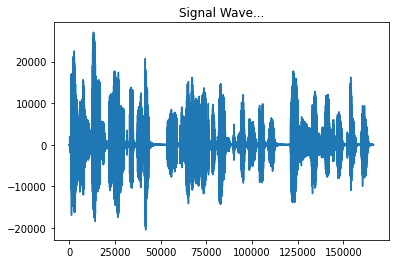

In [12]:
spf = wave.open(filename, "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, np.int16)


# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()

####**4) Create the spectrogram representation of the picked waveform and visualize it**

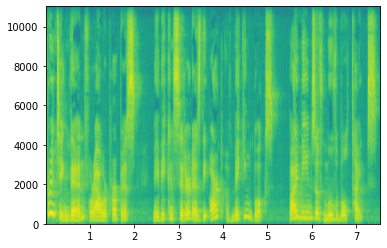

In [13]:
Fs, aud = wavfile.read(filename)
# select left channel only
aud = aud[:]
# trim the first 125 seconds
first = aud[:int(Fs*125)]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
plt.show()


####**5) Create the MFCC representation of the picked waveform and visualize it.**

The shape of the picked waveform is :- (166557,)
The Sample rate of the waveform is :- 22050


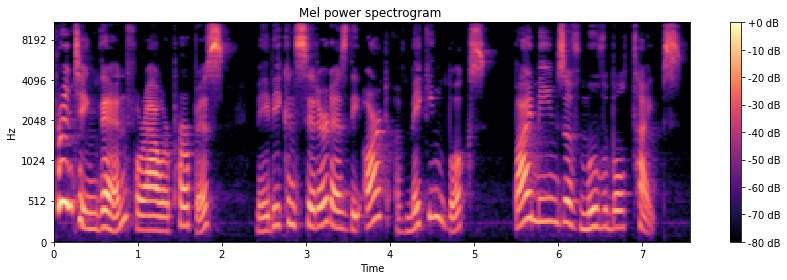

In [14]:
# From this tutorial
# https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb
samples, sample_rate = librosa.load(filename)
print("The shape of the picked waveform is :-",samples.shape)
print("The Sample rate of the waveform is :-",sample_rate)

S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

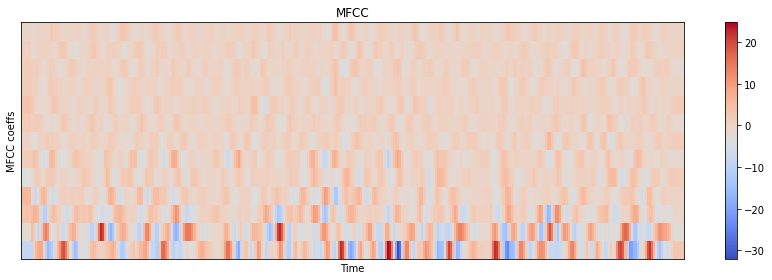

In [15]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

## Task 2: Creating a Wav2Vec2 model that can perform feature extraction and classification.


### **1 - GreedyCTCDecoder**

In [16]:
# TODO code for task 2
# Wav2vec2 https://towardsdatascience.com/wav2vec-2-0-a-framework-for-self-supervised-learning-of-speech-representations-7d3728688cae 
# CTC Algorithm https://distill.pub/2017/ctc/

class GreedyCTCDecoder(torch.nn.Module):
    def __init__(self, labels, blank=0):
        super().__init__()
        self.labels = labels
        self.blank = blank

    def forward(self, emission: torch.Tensor) -> str:
        """Given a sequence emission over labels, get the best path string
        Args:
          emission (Tensor): Logit tensors. Shape `[num_seq, num_label]`.

        Returns:
          str: The resulting transcript
        """
        indices = torch.argmax(emission, dim=-1)  # [num_seq,]
        indices = torch.unique_consecutive(indices, dim=-1)
        indices = [i for i in indices if i != self.blank]
        return "".join([self.labels[i] for i in indices])

In [17]:

def getTransformer(filename): 
  print(filename)
  matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]
  torch.random.manual_seed(0)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  print(torch.__version__)
  print(torchaudio.__version__)
  print(device)


  if not os.path.exists(filename):
      os.makedirs("_assets", exist_ok=True)
      with open(filename, "wb") as file:
          file.write(requests.get(filename).content)
  #Function
  print("Pre-Trained Model")
  bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H # Pretrained Model

  print("Sample Rate:", bundle.sample_rate) # Sample Rate

  print("Labels:", bundle.get_labels()) # Labels
  ##
  model = bundle.get_model().to(device)
  ##
  IPython.display.Audio(filename)
  ##
  print("Our Model")
  waveform, sample_rate = torchaudio.load(filename)
  waveform = waveform.to(device)

  if sample_rate != bundle.sample_rate:
     waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
  print("Sample Rate :- ",sample_rate) 
  print("Waveform :- ",waveform)
  with torch.inference_mode():
    features, _ = model.extract_features(waveform)
  '''
  fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
  for i, feats in enumerate(features):
    ax[i].imshow(feats[0].cpu())
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
  plt.tight_layout()
  plt.show()
  '''
  #
  with torch.inference_mode():
    emission, _ = model(waveform)
  #
  '''
  plt.imshow(emission[0].cpu().T)
  plt.title("Classification result")
  plt.xlabel("Frame (time-axis)")
  plt.ylabel("Class")
  plt.show()
  print("Class labels:", bundle.get_labels()) 
 '''
  decoder = GreedyCTCDecoder(labels=bundle.get_labels())
  transcript = decoder(emission[0])
  return transcript
            

### **2 - Apply Transformation Function on one Sample**

In [18]:
getTransformer(filename) # Apply On One Sample 

/content/wavs/LJ001-0009.wav
1.11.0+cu113
0.11.0+cu113
cpu
Pre-Trained Model
Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960_asr_ls960.pth" to /root/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960_asr_ls960.pth


  0%|          | 0.00/360M [00:00<?, ?B/s]

Our Model
Sample Rate :-  22050
Waveform :-  tensor([[-2.0747e-04, -3.2863e-04, -3.7487e-04,  ..., -4.4222e-04,
         -4.1298e-05,  4.0965e-04]])


'PRINTING|THEN|FOR|OUR|PURPOSE|MAY|BE|CONSIDERED|AS|THE|ART|OF|MAKING|BOOKS|BY|MEANS|OF|MOVABLE|TYPES|'

### **3 - Run Audio**

In [19]:
IPython.display.Audio(filename)

## Task 3: Extract acoustic features and generate predicted transcript for each waveform in the given dataset

### **1 - Appy All Transformation On All dataSets**

In [20]:
# TODO code for task 3
# 100 file wavs 
# Array contains the 100 predicted transcript (hypothesis)
root_path="/content/wavs"
predict_txt=[]
Full_DataSet = os.listdir(root_path)
Full_DataSet
for i in Full_DataSet:
  sample=getTransformer(root_path+"/"+i)
  predict_txt.append(sample)

/content/wavs/LJ001-0006.wav
1.11.0+cu113
0.11.0+cu113
cpu
Pre-Trained Model
Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')
Our Model
Sample Rate :-  22050
Waveform :-  tensor([[7.9629e-05, 1.9648e-04, 1.4432e-04,  ..., 7.4184e-04, 7.8030e-04,
         3.8720e-04]])
/content/wavs/LJ001-0095.wav
1.11.0+cu113
0.11.0+cu113
cpu
Pre-Trained Model
Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')
Our Model
Sample Rate :-  22050
Waveform :-  tensor([[ 0.0006,  0.0008, -0.0008,  ...,  0.0008, -0.0012, -0.0007]])
/content/wavs/LJ001-0066.wav
1.11.0+cu113
0.11.0+cu113
cpu
Pre-Trained Model
Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', '

### **2 - 100 Predicted Text**

In [21]:
predict_txt

['AND|IT|IS|WORTH|MENTION|IN|PASSING|THAT|AS|AN|EXAMPLE|OF|FINE|TYPOGRAPHY|',
 'THESE|AND|SIMILAR|FOUNTS|CAST|BY|THE|ABOVE|FIRM|AND|OTHERS|',
 "IN|FACT|GUNTHER|ZINER'S|FIRST|TYPE|AFTERWARDS|USED|BY|SCHUSLER|IS|REMARKABLY|LIKE|THE|TYPE|OF|THE|BEFORE|MENTIONED|SUBIACO|BOOKS|",
 'HAVE|NOW|COME|INTO|GENERAL|USE|AND|ARE|OBVIOUSLY|A|GREAT|IMPROVEMENT|ON|THE|ORDINARY|MODERN|STYLE|IN|USE|IN|ENGLAND|WHICH|IS|IN|FACT|THE|BODONI|TYPE|',
 "PARMA|AND|ONE|OR|TWO|OTHER|CITIES|WHO|PRODUCED|THE|SPLENDID|EDITIONS|OF|THE|CLASSICS|WHICH|ARE|ONE|OF|THE|GREAT|GLORIES|OF|THE|PRINTER'S|ART|",
 'WENT|ON|APACE|AND|BY|THE|END|OF|THE|SIXTEENTH|CENTURY|THERE|WAS|NO|REALLY|BEAUTIFUL|PRINTING|DONE|',
 'IT|WAS|RESERVED|FOR|THE|FOUNDERS|OF|THE|LATER|EIGHTEENTH|CENTURY|TO|PRODUCE|LETTERS|WHICH|ARE|POSITIVELY|UGLY|AND|WHICH|IT|MAY|BE|ADDED|',
 'THE|EARLIEST|BOOK|PRINTED|WITH|MOVABLE|TYPE|THE|AFFORESAID|GUTTENBERG|BIBLE|IS|PRINTED|IN|LETTERS|WHICH|ARE|AN|EXACT|IMITATION|',
 'AFTER|THE|END|OF|THE|FIFTEENTH|CENTURY|THE|DEG

### **3 - PreProcessing and Create DataFrames**

In [22]:

virtual = pd.DataFrame()
virtual["id"]=Full_DataSet
virtual["pred"]=predict_txt

sorted_virtual = virtual.sort_values(by=['id'], ascending=True)
z_sorted_virtual= sorted_virtual["pred"].str.lower().str.replace("|"," ")
z_sorted_virtual.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



array(['printing in the only sense with which we are at present concerned differs from most if not from all the arts and crafts represented in the exhibition ',
       'in being comparatively modern ',
       'for although the chinese took impressions from wood blocks engraved in relief for centuries before the wood cutters of the netherlands by a similar process ',
       'produced the block books which were the immediate predecessors of the true printed book ',
       'the invention of movable metal letters in the middle of the fifteenth century may justly be considered as the invention of the art of printing ',
       'and it is worth mention in passing that as an example of fine typography ',
       'the earliest book printed with movable types the guttenberg or forty two line bible of about fourteen fifty five ',
       'has never been surpassed ',
       'printing then for our purpose may be considered as the art of making books by means of movable types ',
       'now as all boo

In [23]:
virtual["pred"]=z_sorted_virtual.values
virtual.head()

id                                               pred
0  LJ001-0006.wav  printing in the only sense with which we are a...
1  LJ001-0095.wav                     in being comparatively modern 
2  LJ001-0066.wav  for although the chinese took impressions from...
3  LJ001-0096.wav  produced the block books which were the immedi...
4  LJ001-0057.wav  the invention of movable metal letters in the ...

## Task 4: evaluate the performance of the trained model on the testing dataset using Word Error Rate (WER), Match Error Rate (MER)

Hint: consider this package, https://pypi.org/project/jiwer/

### **1 - Label File**
Read Csv File

In [24]:
# TODO code for task 4

#pre-processing using transformation API
# LowerCase, RemoveWhiteSpace, RemovePunctuation, etc.

#dataframe 
#file_name, ground, predicted (100, 3)
# Calling DataFrame constructor on list

labels = pd.read_csv('/content/labels.csv', sep = '|', names=["file_name","pre_part","next_part"])
labels.head()

file_name                                           pre_part  \
0  LJ001-0001  Printing, in the only sense with which we are ...   
1  LJ001-0002                     in being comparatively modern.   
2  LJ001-0003  For although the Chinese took impressions from...   
3  LJ001-0004  produced the block books, which were the immed...   
4  LJ001-0005  the invention of movable metal letters in the ...   

                                           next_part  
0  Printing, in the only sense with which we are ...  
1  in being comparatively modern.,,,,,,,,,,,,,,,,,,,  
2  For although the Chinese took impressions from...  
3  produced the block books, which were the immed...  
4  the invention of movable metal letters in the ...

**2 - Read First 100 text only**

In [25]:
print(labels.shape)

actualData=labels["pre_part"][:100]
actualData

(523, 3)


0     Printing, in the only sense with which we are ...
1                        in being comparatively modern.
2     For although the Chinese took impressions from...
3     produced the block books, which were the immed...
4     the invention of movable metal letters in the ...
                            ...                        
95    have now come into general use and are obvious...
96    a little reduced in ugliness. The design of th...
97    and the whole effect is a little too gray, owi...
98    It must be remembered, however, that most mode...
99    and these somewhat wiry letters are suitable f...
Name: pre_part, Length: 100, dtype: object

In [26]:
df = pd.DataFrame()
df["file_name"]=labels["file_name"][:100]
df["ground"]=actualData
df["predicted"]=z_sorted_virtual.values

df
#df.to_csv("Final_Results.csv")


file_name                                             ground  \
0   LJ001-0001  Printing, in the only sense with which we are ...   
1   LJ001-0002                     in being comparatively modern.   
2   LJ001-0003  For although the Chinese took impressions from...   
3   LJ001-0004  produced the block books, which were the immed...   
4   LJ001-0005  the invention of movable metal letters in the ...   
..         ...                                                ...   
95  LJ001-0096  have now come into general use and are obvious...   
96  LJ001-0097  a little reduced in ugliness. The design of th...   
97  LJ001-0098  and the whole effect is a little too gray, owi...   
98  LJ001-0099  It must be remembered, however, that most mode...   
99  LJ001-0100  and these somewhat wiry letters are suitable f...   

                                            predicted  
0   printing in the only sense with which we are a...  
1                      in being comparatively modern   
2   for although the chinese took impressions from...  
3   produced the block books which were the immedi...  
4   the invention of movable metal letters in the ...  
..                                                ...  
95  have now come into general use and are obvious...  
96  a little reduced in ugliness the design of the...  
97  and the whole effect is a little too grey owin...  
98  it must be remembered however that most modern...  
99  and these somewhat wiry letters are suitable f...  

[100 rows x 3 columns]

#### **3 - Pre-processing using transformation API**

In [27]:
list_wer=[]
list_mer=[]

for i in range (len(df["ground"])):
        ground_truth = df["ground"][i]
        hypothesis = df["predicted"][i]
        ###
        transformation = jiwer.Compose([
            jiwer.ToLowerCase(),
            jiwer.RemoveWhiteSpace(replace_by_space=True),
            jiwer.RemoveMultipleSpaces(),
            jiwer.RemovePunctuation(),
            jiwer.ReduceToListOfListOfWords(word_delimiter=" "),
        ])
        ### 
        wer=jiwer.wer(
            ground_truth, 
            hypothesis, 
            truth_transform=transformation, 
            hypothesis_transform=transformation
        )
        
        list_wer.append(wer)
        ###
        mer = jiwer.mer(ground_truth, hypothesis,truth_transform=transformation, 
            hypothesis_transform=transformation)
        list_mer.append(mer)
        ###
print("Word Error Rate (WER):- ",sum(list_wer) / len(list_wer)) # Word Error Rate
print("Match Error Rate (MER):- ",sum(list_mer) / len(list_mer))  # Match Error Rate



Word Error Rate (WER):-  0.0953496398906279
Match Error Rate (MER):-  0.07622302748850736


### **So we get 🥰:-**
* Word Error Rate (**WER**):-  **0.0953496398906279**
* Match Error Rate (**MER**):-  **0.07622302748850736**
* Untile these values **close to zeros** it's better.

In [28]:
df["Word_Error_Rate"]=list_wer
df["Match_Error_Rate"]=list_mer
df

file_name                                             ground  \
0   LJ001-0001  Printing, in the only sense with which we are ...   
1   LJ001-0002                     in being comparatively modern.   
2   LJ001-0003  For although the Chinese took impressions from...   
3   LJ001-0004  produced the block books, which were the immed...   
4   LJ001-0005  the invention of movable metal letters in the ...   
..         ...                                                ...   
95  LJ001-0096  have now come into general use and are obvious...   
96  LJ001-0097  a little reduced in ugliness. The design of th...   
97  LJ001-0098  and the whole effect is a little too gray, owi...   
98  LJ001-0099  It must be remembered, however, that most mode...   
99  LJ001-0100  and these somewhat wiry letters are suitable f...   

                                            predicted  Word_Error_Rate  \
0   printing in the only sense with which we are a...         0.000000   
1                      in being comparatively modern          0.000000   
2   for although the chinese took impressions from...         0.083333   
3   produced the block books which were the immedi...         0.000000   
4   the invention of movable metal letters in the ...         0.000000   
..                                                ...              ...   
95  have now come into general use and are obvious...         0.000000   
96  a little reduced in ugliness the design of the...         0.000000   
97  and the whole effect is a little too grey owin...         0.062500   
98  it must be remembered however that most modern...         0.000000   
99  and these somewhat wiry letters are suitable f...         0.000000   

    Match_Error_Rate  
0             0.0000  
1             0.0000  
2             0.0800  
3             0.0000  
4             0.0000  
..               ...  
95            0.0000  
96            0.0000  
97            0.0625  
98            0.0000  
99            0.0000  

[100 rows x 5 columns]

In [29]:
transformation

## Task 5: check files with the worst performance and perform a simple error analysis, e.g., what are the files having worser performance, and what are the potential reasons, do they share any common patterns?


### **1 - Sort To get the Worst 3**

In [64]:
# TODO code for task 5
#comments without code 
getWorstOne = df.sort_values(by=['Word_Error_Rate'], ascending=False)
getWorstOne[:3]

file_name                                             ground  \
44  LJ001-0045                                        1469, 1470;   
6   LJ001-0007  the earliest book printed with movable types, ...   
30  LJ001-0031  In 1465 Sweynheim and Pannartz began printing ...   

                                            predicted  Word_Error_Rate  \
44              fourteen sixty nine fourteen seventy          2.500000   
6   the earliest book printed with movable types t...         0.375000   
30  in fourteen sixty five swaynheim and panarchs ...         0.357143   

    Match_Error_Rate  
44          1.000000  
6           0.315789  
30          0.312500

The **Worst** **3** :- 

1 - **LJ001-0045 (Explained)**

2 - **LJ001-0007 (Explained)**

3 - **LJ001-0031**

### **2 - The Worst one Case (LJ001-0045) 🥴**
As Example record number **44** was the worst one 

In [81]:
getWorstOneGround=getWorstOne["ground"][44]
getWorstOnePredicted=getWorstOne["predicted"][44]
print(getWorstOneGround)
print(getWorstOnePredicted)

1469, 1470;
fourteen sixty nine fourteen seventy 


### **3 - Apply Same Preprocessing on record LJ001-0045**

In [78]:
def testPreprocessing(getWorstOneGround,getWorstOnePredicted):
      getWorstOneGround=jiwer.ToLowerCase()(getWorstOneGround)
      getWorstOneGround=jiwer.RemovePunctuation()(getWorstOneGround)
      getWorstOneGround=jiwer.RemoveWhiteSpace(replace_by_space=True)(getWorstOneGround)
      getWorstOneGround=jiwer.ReduceToListOfListOfWords(word_delimiter=" ")(getWorstOneGround)

      #
      getWorstOnePredicted=jiwer.ToLowerCase()(getWorstOnePredicted)
      getWorstOnePredicted=jiwer.RemovePunctuation()(getWorstOnePredicted)
      getWorstOnePredicted=jiwer.RemoveWhiteSpace(replace_by_space=True)(getWorstOnePredicted)
      getWorstOnePredicted=jiwer.ReduceToListOfListOfWords(word_delimiter=" ")(getWorstOnePredicted)
      return getWorstOneGround,getWorstOnePredicted # return tuple

In [82]:
getWorstOneGround,getWorstOnePredicted=testPreprocessing(getWorstOneGround,getWorstOnePredicted)

print(getWorstOneGround) # hypotheis
print(getWorstOnePredicted) # predicted



[['1469', '1470']]
[['fourteen', 'sixty', 'nine', 'fourteen', 'seventy']]


# **Conclusion**
* The **problem** was no match between the **Words** and **Numbers** .

* **Solution** we can convert the **Words** to **Numbers** to converge , I see it may **help** .
* We can use **word2number** .

* By this way will **decrease** the rate of error .

## **Solution word2number Method**

In [54]:
!pip install word2number

from word2number import w2n
#1469 1470

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=c49d5cb9c4768f291fe95f678b4ad8c33c1a8696e665a2cb9901230253d218c6
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [73]:
print (w2n.word_to_num("two million three thousand nine hundred and eighty four")) # as example 

2003984


## **4 - Let's check anthor example on record ( LJ001-0007 )** 😉

In [83]:
getWorstOneGround=getWorstOne["ground"][6]
getWorstOnePredicted=getWorstOne["predicted"][6]
getWorstOneGround,getWorstOnePredicted=testPreprocessing(getWorstOneGround,getWorstOnePredicted) # call preprocessing function

print(getWorstOneGround)
print(getWorstOnePredicted)

[['the', 'earliest', 'book', 'printed', 'with', 'movable', 'types', 'the', 'gutenberg', 'or', 'fortytwo', 'line', 'bible', 'of', 'about', '1455']]
[['the', 'earliest', 'book', 'printed', 'with', 'movable', 'types', 'the', 'guttenberg', 'or', 'forty', 'two', 'line', 'bible', 'of', 'about', 'fourteen', 'fifty', 'five']]


# **Conclusion (LJ001-0007)**
* I see the same problem happen hear as well so the main problem is how to interact with words to **convert Numbers as example** , I Explained before . 

* The **problem** was no match between the **Words** and **Numbers** .

* **Solution** we can convert the **Words** to **Numbers** to converge , I see it may **help** .
* We can use **word2number** .

* By this way will **decrease** the rate of error .

* look at the end of predicted we can convert **'fourteen', 'fifty', 'five'** to get **1455** 🤪

# **Thank you for your effort for correcting that 🥰 .**